<a href="https://colab.research.google.com/github/vviia/scraping-python/blob/main/web_scrapping_beautiful_soup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Before we begin, run this cell if you are using Colab
!git clone -b 3-ysi-tutorial https://github.com/nestauk/im-tutorials.git

Cloning into 'im-tutorials'...
remote: Enumerating objects: 230, done.
remote: Total 230 (delta 0), reused 0 (delta 0), pack-reused 230
Receiving objects: 100% (230/230), 10.57 MiB | 26.45 MiB/s, done.
Resolving deltas: 100% (96/96), done.


Creating a simple HTML page

In [ ]:
from IPython.core.display import display, HTML

In [ ]:
display(HTML("""
<!DOCTYPE html>
<html lang="en" dir="ltr">
<head>
  <title>Intro to HTML</title>
</head>

<body>
  <h1>Heading h1</h1>
  <h2>Heading h2</h2>
  <h3>Heading h3</h3>
  <h4>Heading h4</h4>

  <p>
    That's a text paragraph. You can also <b>bold</b>, <mark>mark</mark>, <ins>underline</ins>, <del>strikethrough</del> and <i>emphasize</i> words.
    You can also add links - here's one to <a href="https://en.wikipedia.org/wiki/Main_Page">Wikipedia</a>.
  </p>

  <p>
    This <br> is a paragraph <br> with <br> line breaks
  </p>

  <p style="color:red">
    Add colour to your paragraphs.
  </p>

  <p>Unordered list:</p>
  <ul>
    <li>Python</li>
    <li>R</li>
    <li>Julia</li>
  </ul>

  <p>Ordered list:</p>
  <ol>
    <li>Data collection</li>
    <li>Exploratory data analysis</li>
    <li>Data analysis</li>
    <li>Policy recommendations</li>
  </ol>
  <hr>

  <!-- This is a comment -->

</body>
</html>
"""))

## Web Scraping with `requests` and `BeautifulSoup`

We will use `requests` and `BeautifulSoup` to access and scrape the content of [IMDB's homepage](https://www.imdb.com).

### What is `BeautifulSoup`?

It is a Python library for pulling data out of HTML and XML files. It provides methods to navigate the document's tree structure that we discussed before and scrape its content.

### Our pipeline

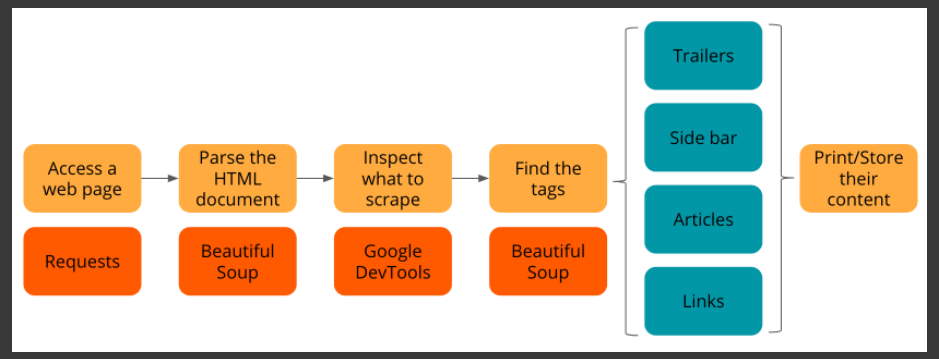

In [ ]:
# Imports
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# IMDB's homepage
imdb_url = 'https://www.imdb.com'

# Use requests to retrieve data from a given URL
imdb_response = requests.get(imdb_url)

# Parse the whole HTML page using BeautifulSoup
imdb_soup = BeautifulSoup(imdb_response.text, 'html.parser')

# Title of the parsed page
imdb_soup.title

<title>IMDb: Ratings, Reviews, and Where to Watch the Best Movies &amp; TV Shows</title>

In [ ]:
# We can also get it without the HTML tags
imdb_soup.title.string

'IMDb: Ratings, Reviews, and Where to Watch the Best Movies & TV Shows'

Collect trailers' title and description

In [ ]:
trailers = imdb_soup.find('div', {'class': 'ab_hero'})

In [ ]:
#print(trailers.prettify())

We will use the `.find_all()` method to search the HTML tree for particular tags and get a `list` with all the relevant objects.

In [ ]:
for title, image in zip(trailers.find_all('div', {'class': 'onoverflow'}), trailers.find_all('img', {'class': 'pri_image'})):
    print(f"{title.text}: {image['title']}")
    print()

AttributeError: ignored

Collect side bar

In [ ]:
for widget in imdb_soup.find_all('div', {'class': 'aux-content-widget-2'}):
    # Check that the widget has a heading
    if widget.h3:
        # Print the widget's heading along with the movie titles.
        print(widget.h3.string)
        for title in widget.find_all('div', {'class': 'title'}):
            print(title.text)
        print()

Collect articles

In [ ]:
for article in imdb_soup.find_all('div', {'class': 'article'}):
    if article.h3:
        # Title of the article
        print(article.h3.string)
        # Text
        print(article.p.text)
        print()

Find links

In many cases, it is useful to collect the links contained in a webpage (for example, you might want to scrape them too). Here is how you can do this.

In [ ]:
# Find all links
links = [link.get('href') for link in imdb_soup.find_all('a')]

# Add homepage and keep the unique links
fixed_links = set([''.join([imdb_url, link]) for link in links if link])

In [ ]:
# fixed_links

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Fetch a website URL and store it to webpage
webpage = requests.get("https://content.codecademy.com/courses/beautifulsoup/cacao/index.html")

#Take the webpage variable and fetch the content using BeautifulSoup
soup = BeautifulSoup(webpage.content, "html.parser")

#Store the whole text in HTML that have the class "Rating" and "CocoaPercent"
rating_column = soup.find_all(attrs={"class": "Rating"})
cocoa_percent_tags = soup.find_all(attrs={"class": "CocoaPercent"})

#Make a empty lists for Rating and CocoaPercent
ratings = []
cocoa_percents = []

#Loop for inserting each table data to list
for x in rating_column[1:] :
  ratings.append(float(x.get_text()))

for td in cocoa_percent_tags[1:] :
  percent = float(td.get_text().strip('%'))
  cocoa_percents.append(percent)

#Combining both ratings and cocoa_percents list to a dictionary
data = {"Company": company, "Rating": ratings, "CocoaPercentage": cocoa_percents}

#Make a new Data Frame from data dictionary
df = pd.DataFrame.from_dict(data)

#Find the fits using polyfit
z = np.polyfit(df.CocoaPercentage, df.Rating, 1)

#Make the line polynomial function using poly1d
line_function = np.poly1d(z)

#Plotting the data
plt.scatter(df.CocoaPercentage, df.Rating)
plt.title('Cocoa Percentage & Ratings Correlation')
plt.xlabel('Cocoa Percentage (%)')
plt.ylabel('Ratings')
plt.plot(df.CocoaPercentage, line_function(df.CocoaPercentage), "r--")
plt.show()

NameError: ignored